<a href="https://colab.research.google.com/github/sarahajbane/notebooks/blob/main/acolite_test_sara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/acolite/acolite.git

Cloning into 'acolite'...
remote: Enumerating objects: 13006, done.
remote: Counting objects: 100% (2108/2108), done.
remote: Compressing objects: 100% (330/330), done.
remote: Total 13006 (delta 1952), reused 1839 (delta 1777), pack-reused 10898 (from 3)
Receiving objects: 100% (13006/13006), 711.70 MiB | 32.50 MiB/s, done.
Resolving deltas: 100% (8319/8319), done.


In [ ]:
%%capture
! pip install rasterio
! pip install pyresample
! pip install netCDF4
#! pip install dvc dagshub
! pip install kaggle_secrets

In [ ]:
import os
import sys
import rasterio
from rasterio.windows import Window
from rasterio.windows import from_bounds
from rasterio.enums import Resampling
from rasterio.transform import Affine
import shutil
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import tempfile
import shutil
from pyproj import Transformer
import gdown
import dask.dataframe as dd
import glob
from tqdm import tqdm
import cv2
#import dagshub
#from dagshub.upload import Repo

In [ ]:
ACOLITE_PATH = "./acolite"
sys.path.append(ACOLITE_PATH)
# Import acolite_run
from acolite.acolite.acolite_run import acolite_run

In [ ]:
nc_file = !wget -O 'LW.nc' 'https://zenodo.org/records/11045944/files/WASP_LW_SENT2_MED_L1C_B_201506_202109_10m_6y_NRT_v1.0.nc'

In [ ]:
import kagglehub
path = kagglehub.dataset_download("sarahajbane/litter-windrows-batch-4")
#path = kagglehub.dataset_download("sarahajbane/litter-windrows-batch-4", "S2B_MSIL1C_20190516T100039_N0500_R122_T33TUL_20221220T162453", force_download = True)
print(f"Path to dataset files: {path}")

In [ ]:
# move from cache to content

source_dir = path
destination_dir = "/content"

if os.path.exists(source_dir):
  try:
    shutil.move(source_dir, destination_dir)
    print(f"Successfully moved data from '{source_dir}' to '{destination_dir}'")
  except Exception as e:
    print(f"Error moving data: {e}")
else:
  print(f"Source directory '{source_dir}' does not exist.")


Successfully moved data from '/root/.cache/kagglehub/datasets/sarahajbane/litter-windrows-batch-4/versions/1' to '/content'


this part works:

In [ ]:
! ls ./1
#safe_files_dir ='/kaggle/input/litter-windrows-batch-4'

S2A_MSIL1C_20190213T101131_N0500_R022_T33TUL_20221128T153324
S2A_MSIL1C_20190315T101021_N0500_R022_T33TUL_20221116T052920
S2A_MSIL1C_20190322T100031_N0500_R122_T33TUL_20221119T025646
S2A_MSIL1C_20190401T100031_N0500_R122_T33TUL_20221019T010704
S2A_MSIL1C_20190501T100031_N0500_R122_T33TUL_20221219T071444
S2A_MSIL1C_20190531T100031_N0500_R122_T33TUL_20221213T082018
S2A_MSIL1C_20190603T101031_N0500_R022_T33TUL_20221221T193704
S2A_MSIL1C_20190620T100031_N0500_R122_T33TUL_20230722T153818
S2A_MSIL1C_20190630T100031_N0500_R122_T33TUL_20230723T095540
S2A_MSIL1C_20190720T100031_N0500_R122_T33TUL_20230715T235221
S2A_MSIL1C_20190723T101031_N0500_R022_T33TUL_20230718T015529
S2A_MSIL1C_20190730T100031_N0500_R122_T33TUL_20230710T202111
S2A_MSIL1C_20190809T100031_N0500_R122_T33TUL_20230515T073846
S2A_MSIL1C_20190819T100031_N0500_R122_T33TUL_20230719T223350
S2A_MSIL1C_20190901T101031_N0500_R022_T33TUL_20230701T230615
S2A_MSIL1C_20191008T100031_N0500_R122_T33TUL_20230613T122804
S2A_MSIL1C_20191011T1010

Available variables:
dict_keys(['s2_product', 'dec_time', 'x_centroid', 'y_centroid', 'lat_centroid', 'lon_centroid', 'n_pixels_fil', 'limits', 'pixel_x', 'pixel_y', 'pixel_spec'])


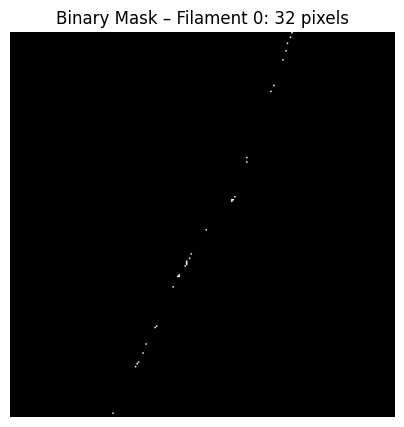

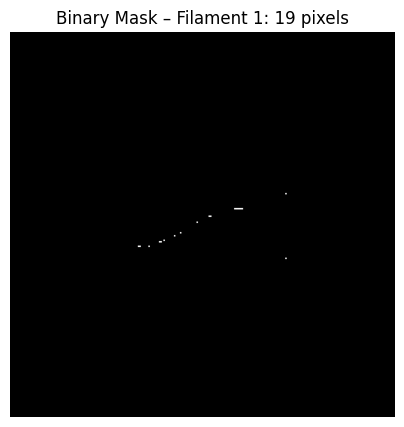

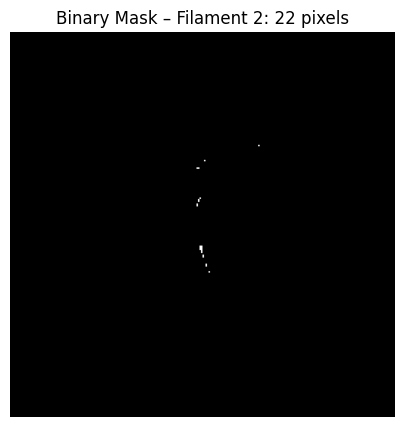

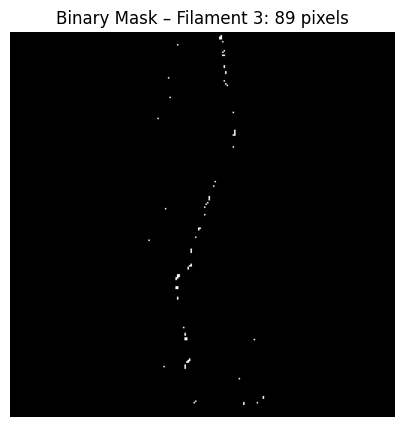

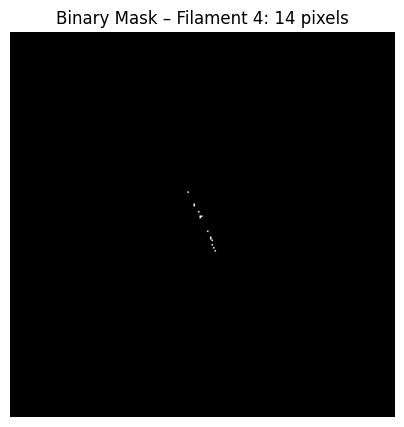

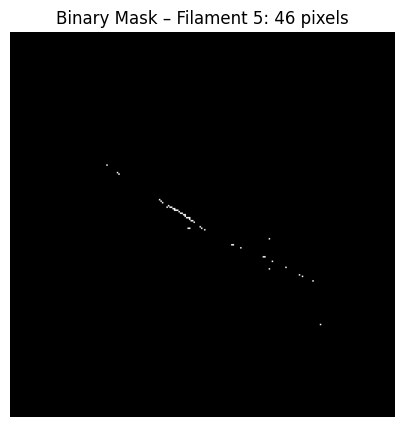

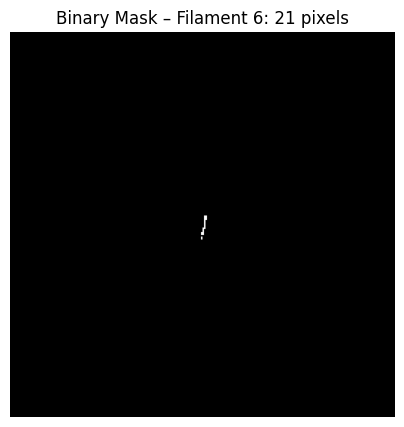

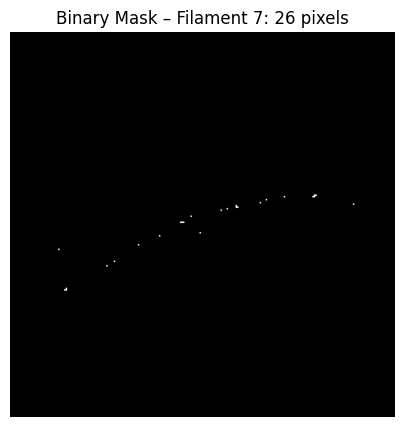

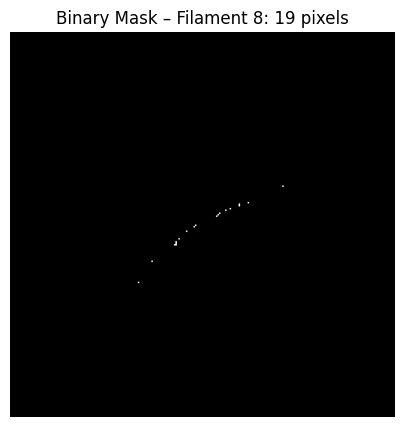

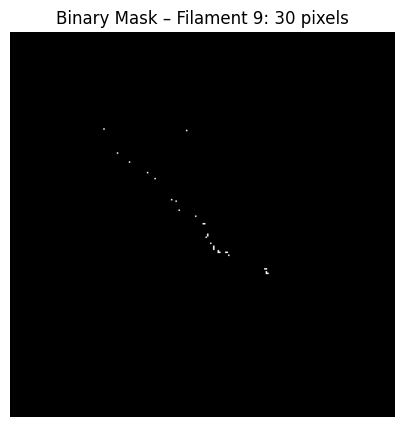

In [73]:
# from mujtaba

from netCDF4 import Dataset

file_path = './LW.nc'
ds = Dataset(file_path, mode='r')

print("Available variables:")
print(ds.variables.keys())

# Define size of the mask canvas (adjustable – here, centered around filament)
for i in range(10):
    canvas_size = 256  # pixels
    center_x = ds.variables['x_centroid'][i]
    center_y = ds.variables['y_centroid'][i]

# Create empty binary mask
    mask = np.zeros((canvas_size, canvas_size), dtype=np.uint8)

# Get valid pixel coordinates for the first filament
    pixels_x = ds.variables['pixel_x'][i]
    pixels_y = ds.variables['pixel_y'][i]
    valid = pixels_x != -999
    pixels_x = pixels_x[valid]
    pixels_y = pixels_y[valid]

# Offset coordinates to center mask on filament
    cnt = 0
    for x, y in zip(pixels_x, pixels_y):
        rel_x = x - center_x + canvas_size // 2
        rel_y = y - center_y + canvas_size // 2
        if 0 <= rel_x < canvas_size and 0 <= rel_y < canvas_size:
            cnt += 1
            mask[rel_y, rel_x] = 1  # Set plastic presence = 1

# Show the binary mask
    plt.figure(figsize=(5, 5))
    plt.imshow(mask, cmap='gray')
    plt.title(f"Binary Mask – Filament {i}: {cnt} pixels")
    plt.axis('off')
    plt.show()

downloading subfolder attempts

In [ ]:
# prompt: try downloading this file through https requests ! wget -O 'S2B_MSIL1C_20190516T100039' 'https://www.kaggle.com/datasets/sarahajbane/litter-windrows-batch-8?select=S2B_MSIL1C_20190516T100039_N0500_R122_T33TUL_20221220T162453'

import requests

def download_file(url, filename):
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes

        with open(filename, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
        print(f"File '{filename}' downloaded successfully.")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading file: {e}")

# Example usage (replace with the actual file URL and desired filename)
#file_url = 'https://zenodo.org/records/11045944/files/WASP_LW_SENT2_MED_L1C_B_201506_202109_10m_6y_NRT_v1.0.nc' #Example, replace with your URL
#file_name = 'LW.nc'
#download_file(file_url, file_name)

file_url = 'https://www.kaggle.com/datasets/sarahajbane/litter-windrows-batch-8?select=S2B_MSIL1C_20190516T100039_N0500_R122_T33TUL_20221220T162453' # Example, replace with your URL
#file_url = 'https://www.kaggle.com/datasets/sarahajbane/litter-windrows-batch-8/download-directory/JQWDbMQAUIVKO9IaiI5O%2Fversions%2F1p03rFQWaz0j974WFI0o%2Fdirectories%2FS2B_MSIL1C_20190516T100039_N0500_R122_T33TUL_20221220T162453?datasetVersionNumber=1'
# S2B_MSIL1C_20190516T100039
file_name = 'S2B_MSIL1C_20190516T100039.zip'
download_file(file_url, file_name)


File 'S2B_MSIL1C_20190516T100039.zip' downloaded successfully.


In [ ]:
! unzip S2B_MSIL1C_20190516T100039.zip

Archive:  S2B_MSIL1C_20190516T100039.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of S2B_MSIL1C_20190516T100039.zip or
        S2B_MSIL1C_20190516T100039.zip.zip, and cannot find S2B_MSIL1C_20190516T100039.zip.ZIP, period.


In [ ]:
! pip install wget
import wget
wget.download('https://www.kaggle.com/datasets/sarahajbane/litter-windrows-batch-8?select=S2B_MSIL1C_20190516T100039_N0500_R122_T33TUL_20221220T162453', "/content")
#! wget -O 'S2B_MSIL1C_20190516T100039' 'https://www.kaggle.com/datasets/sarahajbane/litter-windrows-batch-8?select=S2B_MSIL1C_20190516T100039_N0500_R122_T33TUL_20221220T162453'


ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
! kaggle datasets download sarahajbane/litter-windrows-batch-8/1/S2B_MSIL1C_20190516T100039_N0500_R122_T33TUL_20221220T162453

Invalid dataset specification sarahajbane/litter-windrows-batch-8/1/S2B_MSIL1C_20190516T100039_N0500_R122_T33TUL_20221220T162453


In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

resp = api.process_response(api.datasets_list_files(
    owner_slug="sarahajbane", dataset_slug="litter-windrows-batch-8"))
print(resp)

AttributeError: 'KaggleApi' object has no attribute 'datasets_list_files'

In [ ]:
! kaggle datasets files -d sarahajbane/litter-windrows-batch-8

Next Page Token = CfDJ8KvMat0eHzhGoPokVBGB7D20H_jOV6iktM14VRRBvCP-cI4L2H9wJMSejlGkEENIb9LUhi6LPKpuuoMp3GCGD6A
name                                                                                                                                                                                                                   size  creationDate                
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  --------  --------------------------  
S2B_MSIL1C_20190208T101159_N0500_R022_T33TUL_20221130T204816/S2B_MSIL1C_20190208T101159_N0500_R022_T33TUL_20221130T204816.SAFE/DATASTRIP/DS_S2RP_20221130T204816_S20190208T101158/MTD_DS.xml                       18541377  2025-05-08 17:00:05.264000  
S2B_MSIL1C_20190208T101159_N0500_R022_T33TUL_20221130T204816/S2B_MSIL1C_20190208T101159_N0500_R022_T33TUL_20221130T204816.SAFE/DATASTRIP/DS_

In [ ]:
#!mkdir /root/.config/kaggle
!cp ./kaggle/kaggle.json /root/.config/kaggle

In [ ]:
!chmod 600 /root/.config/kaggle/kaggle.json

In [ ]:

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
